<a href="https://colab.research.google.com/github/SalmaJKhan/MSc_Project_30107961/blob/main/MSc_Project_AI_in_IVF_30107961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Student Name: Salma Javid

Enrolment number: 30107961

Course: MSc. in Artificial Intelligence

Module: CS4T702 MSc Project

Supervisor: Dr Carl Jones

# #1. Introduction

**Project Title:** Applications of AI in IVF — Embryo Classification: AI Architect Design Investigation and Comparative Study

Details: This project aims to develop a tool using artificially intelligent algorithms to classify embryo images for In-Vitro-Fertilization (IVF) treatments. It involves a comprehensive investigation and comparative study of multiple strategies and architectures for classifying a dataset of 2,445 embryo images into silver and gold standards. This implies an in-depth exploration of various AI architectures. We explore a range of techniques from from traditional machine learning models like Support Vector Machines (SVM) and Random Forests to state-of-the-art deep learning techniques such as CNN, ResNet-50, DenseNet-201, VGG16, InceptionV3, and Xception, to determine the most effective model for accurate embryo classification.

# — Importing libraries
First let's import the required modules and libraries.

**Please Note:** We will do this as and when required.

In [1]:
import io #for streaming input and output data
import os #for operating system-related functionality (Eg. List all files)
import numpy as np #for numerical operations, for handling arrays and matrices
import seaborn as sns #data visualization library based on Matplotlib for statistical graphics
import pandas as pd #for creating dataframes, for data manipulation and analysis, etc.
import matplotlib.pyplot as plt #plotting library to visualize data via charts, graphs, etc.
from google.colab import files #for uploading and downloading files
from google.colab import drive #to mount Google Drive
from tqdm import tqdm #Derived from the Arabic word "taqaddum" it  displays "progress" bar
from PIL import Image #Python Imaging Library for working with images
from sklearn.model_selection import train_test_split #for splitting the data
from sklearn.preprocessing import LabelEncoder #to convert categorical labels into numerical labels
from IPython.display import display, Image as IPImage #for displaying images

#— Listing Files & Folders of the Database

In [2]:
# Defining  path to the Blastocyst_Dataset folder
dataset_path = '/content/drive/My Drive/Blastocyst_Dataset'

# Listing files and folders in the dataset directory
file_and_folder_names = os.listdir(dataset_path)

# Printing the names of files and folders
print("Files and folders in 'Blastocyst_Dataset':")
for name in file_and_folder_names:
    print(name)


Files and folders in 'Blastocyst_Dataset':
Blastocyst_Dataset
Blastocyst_Dataset.csv


# #2. Database Inspection

#— Listing First 7 Records
Printing the first 7 rows from the dataframe.

In [3]:
import pandas as pd

# Defining the path to the CSV file
csv_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset.csv'

# Loading the CSV file into a DataFrame
Blastocyst_Dataset = pd.read_csv(csv_path)

# Displaying the first 7 rows of the DataFrame
print("First 7 rows of the dataset:")
Blastocyst_Dataset.head(7)

First 7 rows of the dataset:


Image File Name  EXP  ICM   TE Standard
0     0175_05.png  3.0  1.0  1.0   Silver
1      420_02.png  3.0  0.0  0.0   Silver
2      680_01.png  2.0  0.0  0.0   Silver
3      340_03.png  3.0  0.0  1.0   Silver
4      571_02.png  0.0  3.0  3.0   Silver
5     0064_01.png  3.0  0.0  1.0   Silver
6      478_03.png  3.0  0.0  0.0   Silver

#— Listing Last 7 Records
Printing the last 7 rows from the dataframe.

In [4]:
# Printing the last 7 rows of the DataFrame
print("Last 7 rows of the dataset:")
Blastocyst_Dataset.tail(7)

Last 7 rows of the dataset:


Image File Name  EXP  ICM   TE Standard
2337      832_01.png  3.0  1.0  0.0     Gold
2338      832_02.png  2.0  1.0  0.0     Gold
2339      833_02.png  NaN  NaN  1.0     Gold
2340      835_05.png  3.0  0.0  NaN     Gold
2341      836_01.png  3.0  2.0  1.0     Gold
2342      837_01.png  3.0  0.0  1.0     Gold
2343      837_02.png  2.0  1.0  2.0     Gold

**Result:** We can see a few NaN, the fullform of which is "Not a Number"; it represents missing or undefined data. *We will handle it in a while.*

#— Displaying first 7 images with features

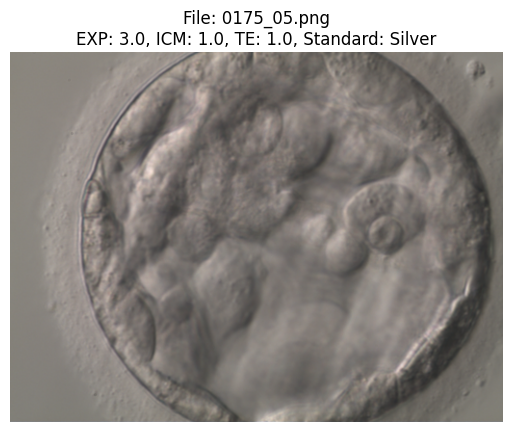

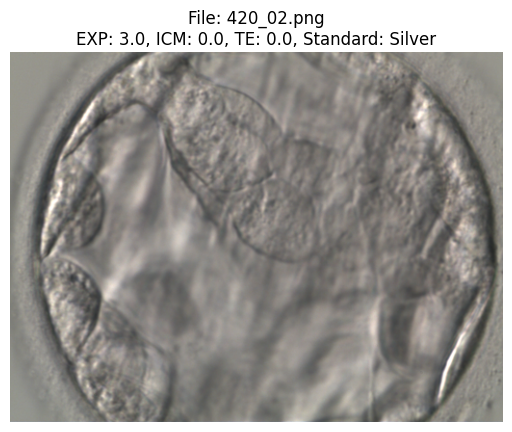

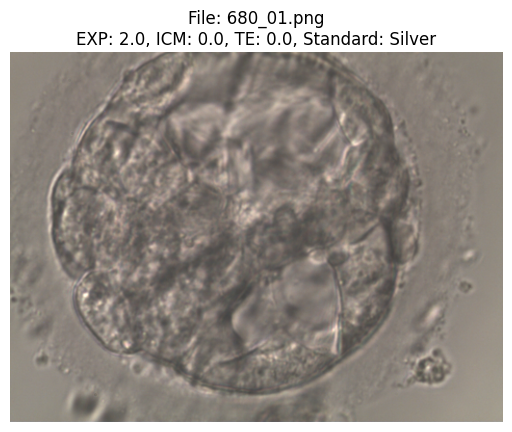

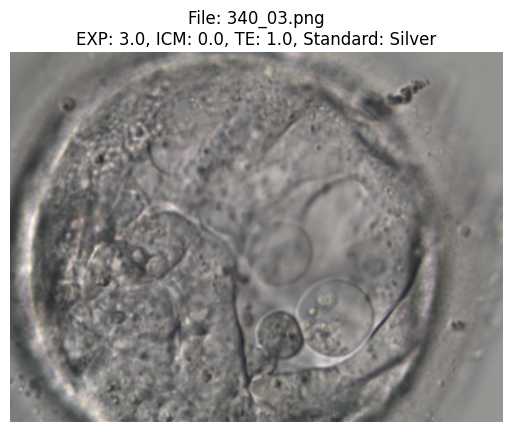

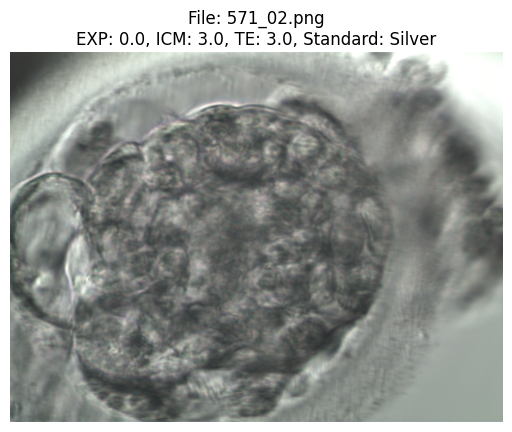

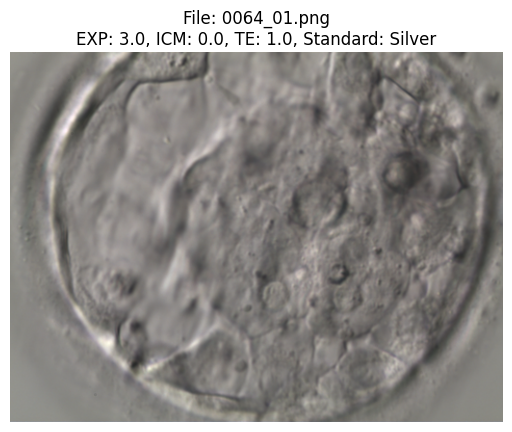

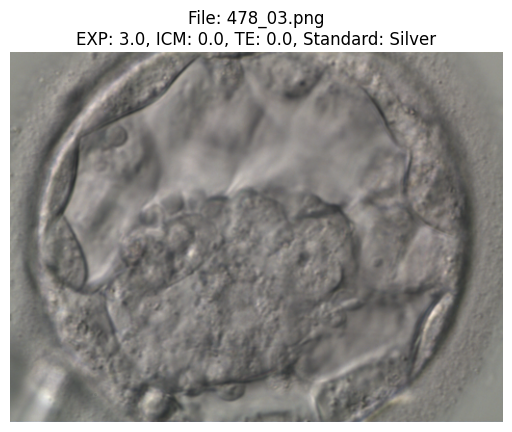

In [5]:
from PIL import Image as PILImage

# Defining image path
image_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset/'

# Displaying the first 7 images with their corresponding features
for i in range(7):
    # Getting the image file name from the DataFrame
    image_file = Blastocyst_Dataset.loc[i, 'Image File Name']

    # Getting the full path to the image
    full_image_path = os.path.join(image_path, image_file)

    # Loading and displaying the image
    img = PILImage.open(full_image_path)
    plt.imshow(img)
    plt.axis('off')

    # Displaying the corresponding features
    exp = Blastocyst_Dataset.loc[i, 'EXP']
    icm = Blastocyst_Dataset.loc[i, 'ICM']
    te = Blastocyst_Dataset.loc[i, 'TE']
    standard = Blastocyst_Dataset.loc[i, 'Standard']

    plt.title(f"File: {image_file}\nEXP: {exp}, ICM: {icm}, TE: {te}, Standard: {standard}")
    plt.show()

# — Dataset Info
Let's get some information of our dataframe/database. The code will display the summary about the Blastocyst_Dataset dataframe, including the number of entries, column names, data types, and non-null counts for each column.

In [6]:
Blastocyst_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344 entries, 0 to 2343
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image File Name  2344 non-null   object 
 1   EXP              2342 non-null   float64
 2   ICM              2282 non-null   float64
 3   TE               2278 non-null   float64
 4   Standard         2344 non-null   object 
dtypes: float64(3), object(2)
memory usage: 91.7+ KB


# — Dataset Description
The code will generate descriptive statistics of the Blastocyst_Dataset dataframe, providing information such as count, mean, standard deviation, min, max, and the 25th, 50th, and 75th percentiles for each numerical column in the dataset.

In [ ]:
Blastocyst_Dataset.describe()

EXP          ICM           TE
count  2342.000000  2282.000000  2278.000000
mean      2.369342     0.718230     0.848990
std       1.056199     1.122451     1.107338
min       0.000000     0.000000     0.000000
25%       2.000000     0.000000     0.000000
50%       3.000000     0.000000     0.000000
75%       3.000000     1.000000     1.000000
max       4.000000     3.000000     3.000000

# — Dataset Shape
Displays dimensions (count of rows and columns) of the Blastocyst_Dataset dataframe

In [7]:
Blastocyst_Dataset.shape

(2344, 5)

Result: The dataset has 2344 rows/records and 5 columns/features.

# — Dataset Size
Finding the size of the dataset

In [8]:
Blastocyst_Dataset.size

11720

11720 is the overall size of the dataset.

2344 x 5 = 11720

# — Listing Columns Names
Now let's find out the names of features [columns] in the dataset

In [9]:
Blastocyst_Dataset.columns

Index(['Image File Name', 'EXP', 'ICM', 'TE', 'Standard'], dtype='object')

Result: The dataframe has the **5** following columns:

1. **Image File Name** which has the file name of the image.
2. **EXP** column/feature which refers to Blastocyst Cavity Expansion.
3. **ICM** column/feature which refers to Inner Cell Mass quality.
4. **TE** column/feature which refers to Trophectoderm quality.
5. **Standard** column/feature which shows image's Classification: Gold or Silver.

# — Number of Columns

In [ ]:
len(Blastocyst_Dataset.columns)

5

Result: The dataset has 5 column/features.

# — Length of the Dataset

In [10]:
len(Blastocyst_Dataset)

2344

Result: The length of the dataframe is 2344 rows/records.

# — Listing Unique Values in Target Column
Let's find out the unique values from the 'Standard' column/feature

In [11]:
Standards = Blastocyst_Dataset['Standard'].unique()
print("Standard:", Standards)


Standard: ['Silver' 'Gold']


Result: The dataset has two unique values in the Standard column, which are Silver and Gold.

# #3. Data Visualization

# — Pie Chart

In [ ]:
import plotly.graph_objects as go

# Getting the count of each category in the 'Standard' column
standard_counts = Blastocyst_Dataset['Standard'].value_counts()

# Creating a pie chart
fig = go.Figure(
    data=[go.Pie(
        labels=standard_counts.index,  # 'Silver', 'Gold'
        values=standard_counts.values,  # Corresponding counts
        textinfo='label+value+percent',  # Show label, value, and percentage
        textfont_size=13,
        marker=dict(colors=['silver', 'gold'], line=dict(color='#000000', width=2))
    )]
)

# Update the hover information and display the chart
fig.update_traces(hoverinfo='label+value+percent')
fig.show()


**Result:** The dataframe has 2044 silver standard embryo images which account for 87.2% and 300 gold standard images which account for 12.8% of the total images.

# — Bar Chart

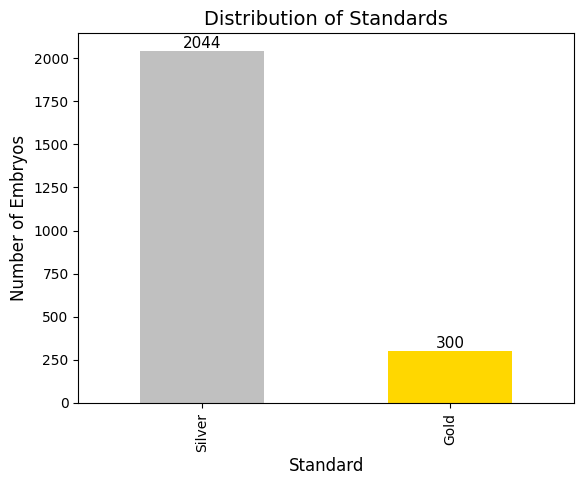

In [ ]:
import matplotlib.pyplot as plt

# Defining colors for classes
class_colors = {'Silver': 'silver', 'Gold': 'gold'}

# Getting the value counts
class_counts = Blastocyst_Dataset['Standard'].value_counts()

# Specifying colors based on class names
colors = [class_colors[standard] for standard in class_counts.index]

# Creating the bar chart
ax = class_counts.plot(kind='bar', color=colors)

# Adding the title and labels
plt.xlabel('Standard', fontsize=12)
plt.ylabel('Number of Embryos', fontsize=12)
plt.title('Distribution of Standards', fontsize=14)

# Adding the count labels on top of the bars
for i, count in enumerate(class_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=11, color='black')

# Displaying the chart
plt.show()


**Result:** Same as above.

# — Blastocyst Cavity Expansion (EXP) Distribution

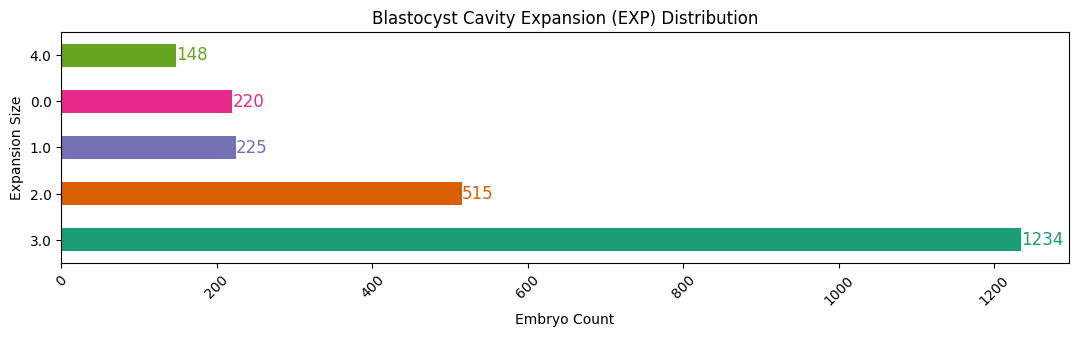

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the value counts for the 'EXP' column, excluding NaN values
exp_counts = Blastocyst_Dataset['EXP'].dropna().value_counts()

# Display the EXP column in a bar chart
plt.figure(figsize=(13, 3))
bar_plot = exp_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(exp_counts)))

# Add the total count labels on the bars
for index, value in enumerate(exp_counts):
    plt.text(value, index, str(value), va='center', ha='left',
             fontsize=12, color=sns.color_palette('Dark2', n_colors=len(exp_counts))[index])

# Set titles and labels
plt.title('Blastocyst Cavity Expansion (EXP) Distribution')
plt.xlabel('Embryo Count')
plt.ylabel('Expansion Size')
plt.xticks(rotation=45)
plt.show()


**Result:**
- 148 embryos have 4.0 expansion size
- 220 have 0.0 expansion size
- 225 have 1.0 size
- 515 have 2.0 size, and
- 1234 have 3.0 expansion size

# — Histogram of Blastocyst Cavity Expansion (EXP) Distribution

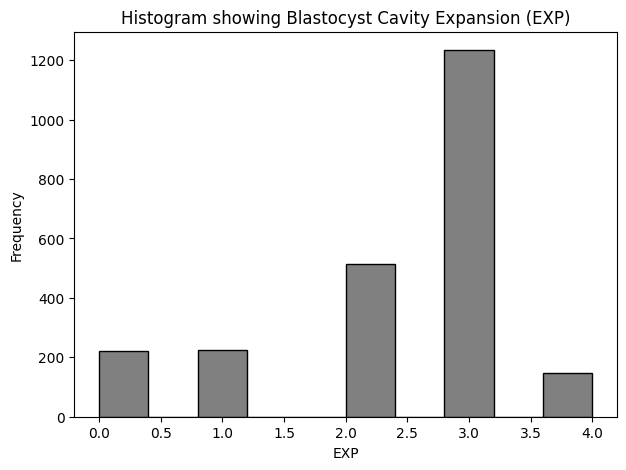

In [ ]:
# Display the EXP column in a histogram
plt.figure(figsize=(7, 5))
plt.hist(Blastocyst_Dataset['EXP'], color='grey', edgecolor='black')
plt.title('Histogram showing Blastocyst Cavity Expansion (EXP)')
plt.xlabel('EXP')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# — Inner Cell Mass (ICM) Quality Distribution

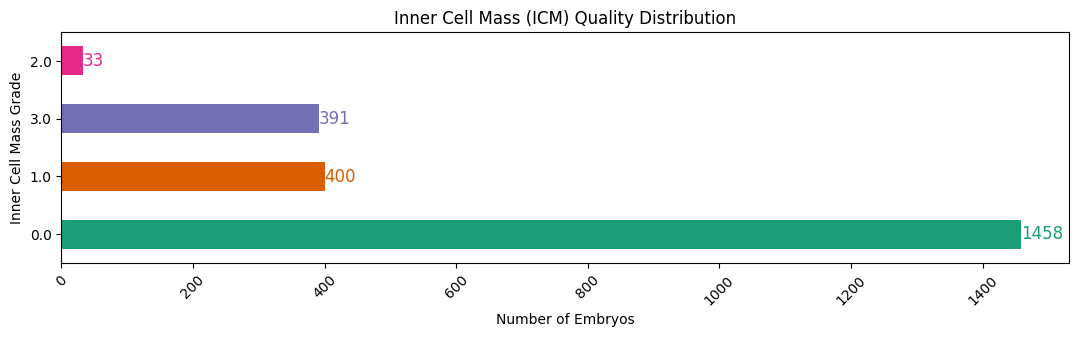

In [ ]:
# Calculate the value counts for the 'ICM' column, excluding NaN values
icm_counts = Blastocyst_Dataset['ICM'].dropna().value_counts()

# Display the ICM column in a bar chart
plt.figure(figsize=(13, 3))
bar_plot = icm_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(icm_counts)))

# Add the total count labels on the bars
for index, value in enumerate(icm_counts):
    plt.text(value, index, str(value), va='center', ha='left',
             fontsize=12, color=sns.color_palette('Dark2', n_colors=len(exp_counts))[index])

# Set titles and labels
plt.title('Inner Cell Mass (ICM) Quality Distribution')
plt.xlabel('Number of Embryos')
plt.ylabel('Inner Cell Mass Grade')
plt.xticks(rotation=45)
plt.show()


**Result:**
- 1458 embryos with 0.0 Inner Cell Mass Grade
- 400 embryos with 1.0 ICM Grade
- 391 with 3.0 ICM Grade and
- just 33 with 2.0 Grade

# — Trophectoderm Epithelium (TE) Quality Distribution

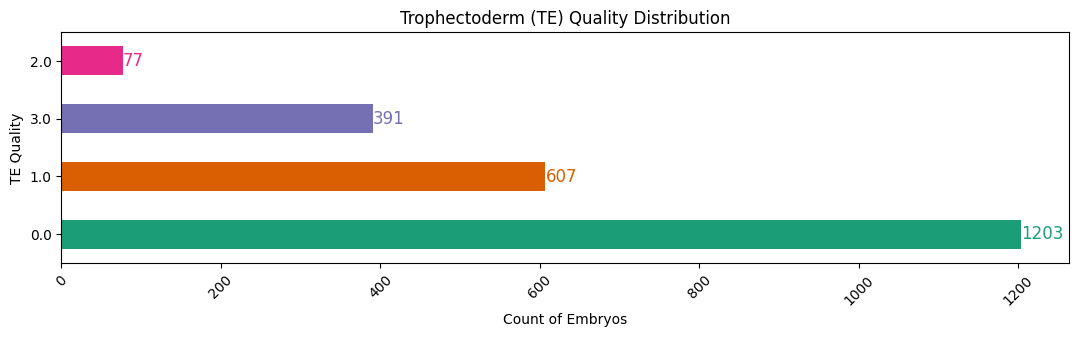

In [13]:
# Calculate the value counts for the 'TE' column, excluding NaN values
te_counts = Blastocyst_Dataset['TE'].dropna().value_counts()

# Display the TE column in a bar chart
plt.figure(figsize=(13, 3))
bar_plot = te_counts.plot(kind='barh', color=sns.color_palette('Dark2', n_colors=len(te_counts)))

# Add the total count labels on the bars
for index, value in enumerate(te_counts):
    plt.text(value, index, str(value), va='center', ha='left',
             fontsize=12, color=sns.color_palette('Dark2', n_colors=len(te_counts))[index])

# Set titles and labels
plt.title('Trophectoderm (TE) Quality Distribution')
plt.xlabel('Count of Embryos')
plt.ylabel('TE Quality')
plt.xticks(rotation=45)
plt.show()

**Result:**
- 1203 embryos with 0.0 TE Quality Grade
- 607 with 1.0 TE Grade
- 391 with 3.0 Grade, and
- 77 with 2.0 grade.

# — [Pair Plot] Visualize the relationships between EXP-ICM-TE and Standard

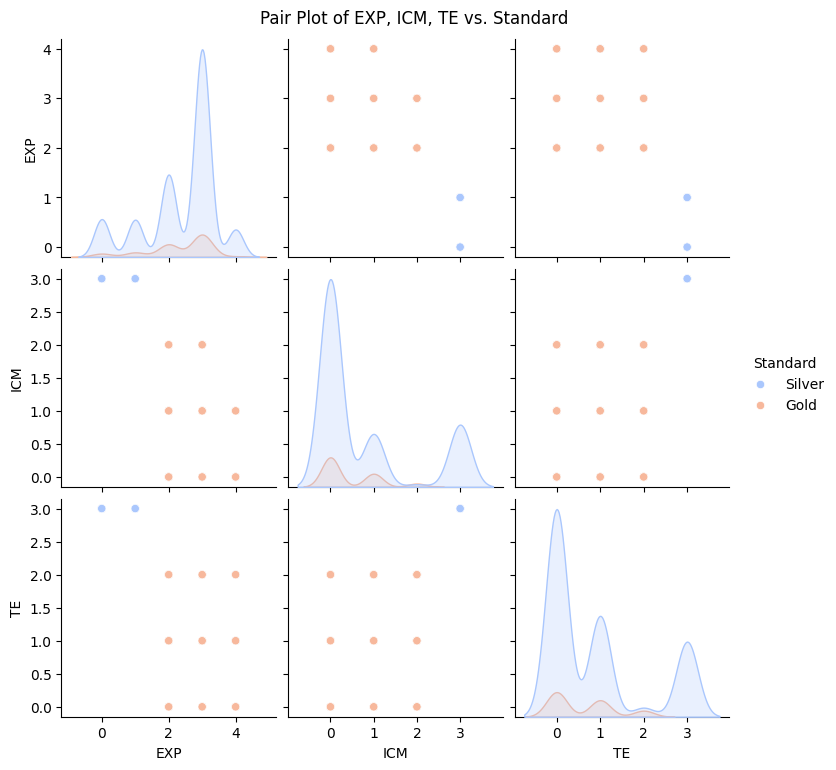

In [ ]:
# Create a pair plot to visualize the relationships between EXP, ICM, TE, and Standard
sns.pairplot(Blastocyst_Dataset, hue='Standard', vars=['EXP', 'ICM', 'TE'], palette='coolwarm')
plt.suptitle("Pair Plot of EXP, ICM, TE vs. Standard", y=1.02)
plt.show()


# — Violin plots to Visualize Relationships

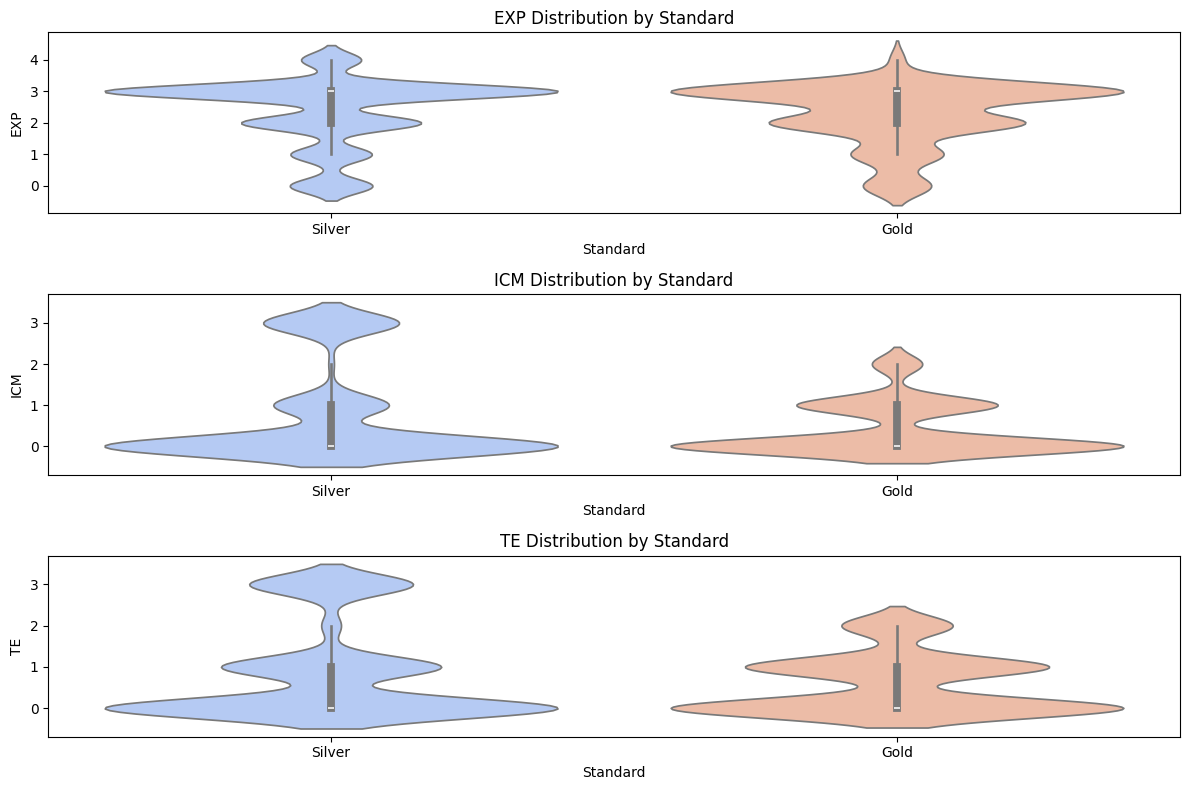

In [ ]:
# Create a figure with subplots for each feature
plt.figure(figsize=(12, 8))

# Violin plot for EXP
plt.subplot(3, 1, 1)
sns.violinplot(x='Standard', y='EXP', hue='Standard', data=Blastocyst_Dataset, palette='coolwarm', legend=False)
plt.title('EXP Distribution by Standard')

# Violin plot for ICM
plt.subplot(3, 1, 2)
sns.violinplot(x='Standard', y='ICM', hue='Standard', data=Blastocyst_Dataset, palette='coolwarm', legend=False)
plt.title('ICM Distribution by Standard')

# Violin plot for TE
plt.subplot(3, 1, 3)
sns.violinplot(x='Standard', y='TE', hue='Standard', data=Blastocyst_Dataset, palette='coolwarm', legend=False)
plt.title('TE Distribution by Standard')

# Adjust layout
plt.tight_layout()
plt.show()

# — Correlation Matrix: EXP, ICM, TE, and Standard

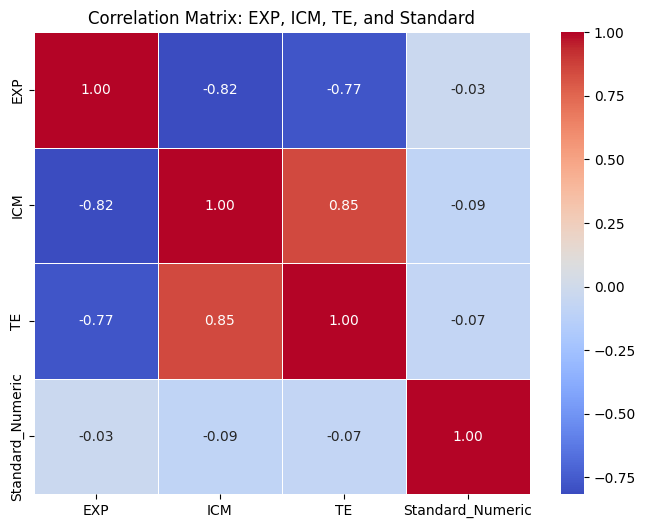

In [14]:
# Convert the 'Standard' column to numerical values: Gold = 1, Silver = 0
Blastocyst_Dataset['Standard_Numeric'] = Blastocyst_Dataset['Standard'].map({'Gold': 1, 'Silver': 0})

# Selecting only the numerical columns for correlation
numeric_columns = Blastocyst_Dataset[['EXP', 'ICM', 'TE', 'Standard_Numeric']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: EXP, ICM, TE, and Standard')
plt.show()


**Heatmap Interpretation:**

Diagonal Values (1.00): These are always 1 because a variable is perfectly correlated with itself.

EXP vs. ICM (-0.82): There is a strong negative correlation between EXP and ICM, meaning that as EXP increases, ICM decreases.

EXP vs. TE (-0.77): Similarly, there is a strong negative correlation between EXP and TE, meaning that as EXP increases, TE decreases.

ICM vs. TE (0.85): There is a strong positive correlation between ICM and TE, meaning they tend to increase or decrease together.

Standard_Numeric vs. Other Variables (All values close to 0): The values are close to 0, indicating that the "Standard_Numeric" variable has little to no linear correlation with EXP, ICM, and TE.

# — 3D Scatter Plot: EXP vs ICM vs TE colored by Standard

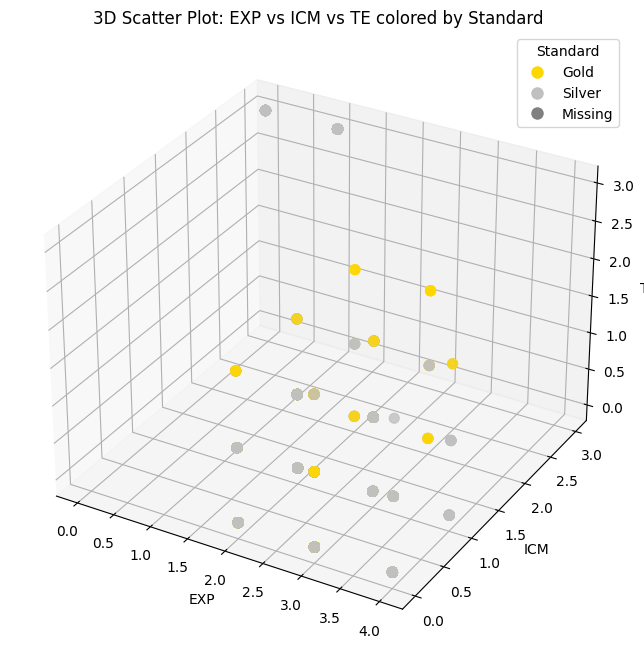

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the color map based on the 'Standard' values
color_map = {'Gold': 'gold', 'Silver': 'silver'}

# Map 'Standard' values to their corresponding colors
colors = Blastocyst_Dataset['Standard'].map(color_map).fillna('gray')

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points in the 3D space
scatter = ax.scatter(
    Blastocyst_Dataset['EXP'],
    Blastocyst_Dataset['ICM'],
    Blastocyst_Dataset['TE'],
    c=colors,
    s=50,  # Size of the points
    alpha=0.8  # Transparency of the points
)

# Set labels for the axes
ax.set_xlabel('EXP')
ax.set_ylabel('ICM')
ax.set_zlabel('TE')

# Add a legend to explain the colors
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold', markersize=10, label='Gold'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='silver', markersize=10, label='Silver'),
                 plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=10, label='Missing')]  # Handle any missing values
ax.legend(handles=legend_labels, title="Standard")

# Set the title of the plot
ax.set_title('3D Scatter Plot: EXP vs ICM vs TE colored by Standard')

# Display the plot
plt.show()


# #4. Data Preprocessing

# — Checking for Missing Values

In [15]:
Blastocyst_Dataset.isnull()

Image File Name    EXP    ICM     TE  Standard  Standard_Numeric
0               False  False  False  False     False             False
1               False  False  False  False     False             False
2               False  False  False  False     False             False
3               False  False  False  False     False             False
4               False  False  False  False     False             False
...               ...    ...    ...    ...       ...               ...
2339            False   True   True  False     False             False
2340            False  False  False   True     False             False
2341            False  False  False  False     False             False
2342            False  False  False  False     False             False
2343            False  False  False  False     False             False

[2344 rows x 6 columns]

It is hard to see the whole dataframe using the above method, so now using it along with the sum() method to understand it better.

In [16]:
Blastocyst_Dataset.isnull().sum()

Image File Name      0
EXP                  2
ICM                 62
TE                  66
Standard             0
Standard_Numeric     0
dtype: int64

**Missing Values Summary:**

Image File Name: 0 —
There are no missing values in the Image File Name column. Every record has a corresponding image file name.

EXP: 2 —
There are 2 missing values in the EXP (Expansion) column. This means that for 2 records, the expansion data is not available.

ICM: 62 —
There are 62 missing values in the ICM (Inner Cell Mass) column. A significant number of records are missing data in this column.

TE: 66 —
There are 66 missing values in the TE (Trophectoderm) column. Similar to the ICM column, this also has a considerable number of missing records.

Standard: 0 —
There are no missing values in the Standard column. Every record has a classification or standard value.

Standard_Numeric: 0  —
This is the standard column coverted to numbers. As there's no missing values in Standard column, there are no missing values in this.

# — K Nearest Neighbors (KNN) Imputation

For ICM and TE we have 62 and 66 missing values respectively so using KNN imputation can be beneficial as it takes into account the similarity of 5 instances. Majorly because my dataset in CSV file  itself shows continous silver values, and later continous gold values. So nearest neighbour imputation is best suited here.

As EXP has only 2 missing values, simple mean or median imputation is sufficient.

In [17]:
from sklearn.impute import SimpleImputer, KNNImputer

# Impute 'EXP' with mean (since it has only a 2 missing values)
simple_imputer = SimpleImputer(strategy='mean')
Blastocyst_Dataset[['EXP']] = simple_imputer.fit_transform(Blastocyst_Dataset[['EXP']])

# Impute 'ICM' and 'TE' with KNN
knn_imputer = KNNImputer(n_neighbors=5)
Blastocyst_Dataset[['ICM', 'TE']] = knn_imputer.fit_transform(Blastocyst_Dataset[['ICM', 'TE']])


**Verifying if any missing values remain**

In [18]:
Blastocyst_Dataset.isnull().sum()

Image File Name     0
EXP                 0
ICM                 0
TE                  0
Standard            0
Standard_Numeric    0
dtype: int64

**Result:** Success! No missing values.

# #5. Feature Engineering

#— Feature Mapping

Let's verify if the standard feature is converted to binary variables in the new column called "Standard_Numeric".

— Silver is converted to 0

— Gold is converted to 1

In [19]:
Blastocyst_Dataset.head()

Image File Name  EXP  ICM   TE Standard  Standard_Numeric
0     0175_05.png  3.0  1.0  1.0   Silver                 0
1      420_02.png  3.0  0.0  0.0   Silver                 0
2      680_01.png  2.0  0.0  0.0   Silver                 0
3      340_03.png  3.0  0.0  1.0   Silver                 0
4      571_02.png  0.0  3.0  3.0   Silver                 0

In [20]:
Blastocyst_Dataset.tail()

Image File Name       EXP  ICM   TE Standard  Standard_Numeric
2339      833_02.png  2.369342  0.0  1.0     Gold                 1
2340      835_05.png  3.000000  0.0  0.2     Gold                 1
2341      836_01.png  3.000000  2.0  1.0     Gold                 1
2342      837_01.png  3.000000  0.0  1.0     Gold                 1
2343      837_02.png  2.000000  1.0  2.0     Gold                 1

**Success! Now our Standard feature has binary values.**

#— Splitting the Dataset
I’m splitting the dataset into training and testing sets to evaluate the model's performance — Ratio: 90:10.

90% training data and 10% to test


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Create a new column in the dataset that contains the full image file path
Blastocyst_Dataset['Image_Path'] = Blastocyst_Dataset['Image File Name'].apply(lambda x: os.path.join(image_path, x))

# Split the dataset into features (image paths) and labels (Standard_Numeric)
image_paths = Blastocyst_Dataset['Image_Path']
labels = Blastocyst_Dataset['Standard_Numeric']

# Perform the 90:10 train-test split
train_images, test_images, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.1, random_state=33, stratify=labels
)

# Display the number of training and testing set images
print(f"\nNumber of training images: {len(train_images)}")
print(f"\nNumber of testing images: {len(test_images)}")



Number of training images: 2109

Number of testing images: 235


#—  Checking Class Distribution
In training and testing sets

In [22]:
# Display class distribution in training set
train_distribution = train_labels.value_counts()
print("Training Set Class Distribution:")
print(f"Gold (1): {train_distribution[1]}")
print(f"Silver (0): {train_distribution[0]}")

# Display class distribution in testing set
test_distribution = test_labels.value_counts()
print("\nTesting Set Class Distribution:")
print(f"Gold (1): {test_distribution[1]}")
print(f"Silver (0): {test_distribution[0]}")


Training Set Class Distribution:
Gold (1): 270
Silver (0): 1839

Testing Set Class Distribution:
Gold (1): 30
Silver (0): 205


# — Feature Scaling

# — Normalizing, Resizing and Rescaling Images
Algorithms such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Neural Networks generally perform better with normalized data because they assume features are on a similar scale.

In [2]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

# Define a function to normalize images
def normalize_image(image_path, target_size=(128, 128)):
    # Load and resize the image
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)  # Convert image to array

    # Normalize pixel values to the range [0, 1]
    img_array_normalized = img_array / 255.0

    return img_array_normalized

# Create empty lists for images and labels
image_data = []
labels = []

# Iterate over rows in the DataFrame
for index, row in tqdm(Blastocyst_Dataset.iterrows(), total=len(Blastocyst_Dataset)):
    image_file = row['Image File Name']
    image_path_full = os.path.join(image_path, image_file)

    # Load and preprocess the image
    img_array_normalized = normalize_image(image_path_full)

    # Append to the lists
    image_data.append(img_array_normalized)
    labels.append(row['Standard_Numeric'])

# Convert lists to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Check the shapes of the arrays
print(f"Image data shape: {image_data.shape}")
print(f"Labels shape: {labels.shape}")


100%|██████████| 2344/2344 [00:28<00:00, 82.84it/s]


Image data shape: (2344, 128, 128, 3)
Labels shape: (2344,)


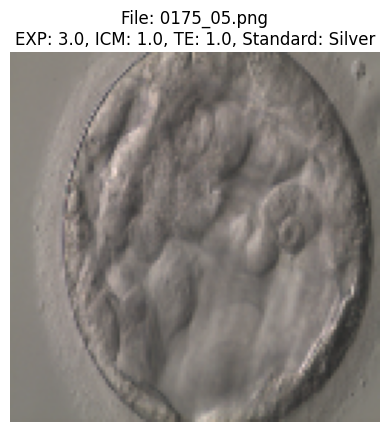

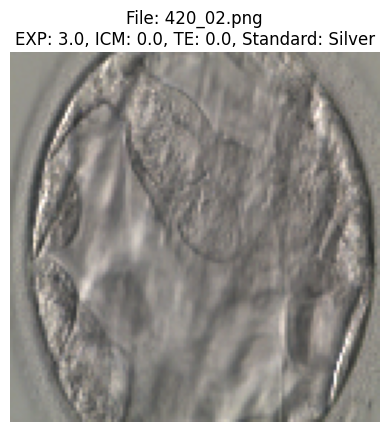

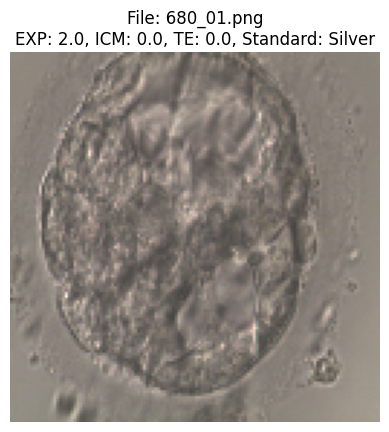

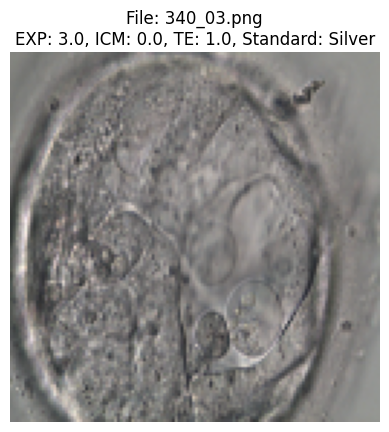

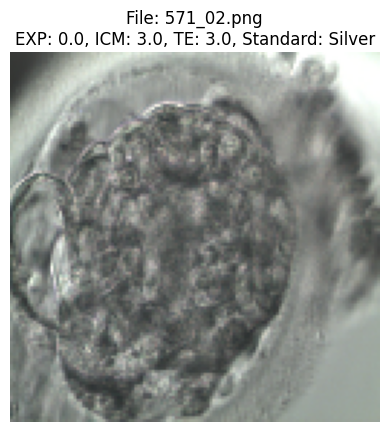

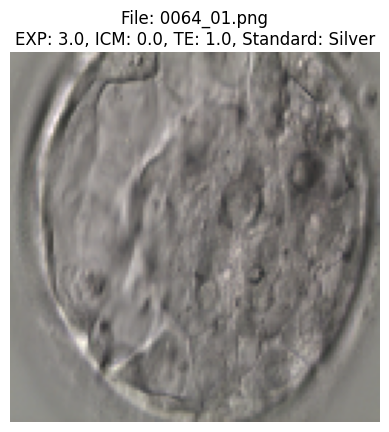

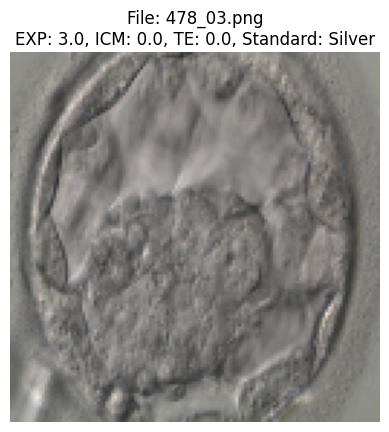

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to display images
# Display the first 7 images and their corresponding features
for i in range(7):
    # Get the image file name from the DataFrame
    image_file = Blastocyst_Dataset.loc[i, 'Image File Name']

    # Get the full path to the image
    full_image_path = os.path.join(image_path, image_file)

    # Load and preprocess the image
    img_array_normalized = normalize_image(full_image_path)

    # Display the image
    plt.imshow(img_array_normalized)
    plt.axis('off')

    # Display the corresponding features
    exp = Blastocyst_Dataset.loc[i, 'EXP']
    icm = Blastocyst_Dataset.loc[i, 'ICM']
    te = Blastocyst_Dataset.loc[i, 'TE']
    standard = Blastocyst_Dataset.loc[i, 'Standard']

    plt.title(f"File: {image_file}\nEXP: {exp}, ICM: {icm}, TE: {te}, Standard: {standard}")
    plt.show()


# — Standardization
Feature scaling is an important step to ensure that the models perform optimally, especially if they are sensitive to the magnitude of the features. Standardization and normalization are common techniques for scaling features.

Standardization scales features so that they have a mean of 0 and a standard deviation of 1. This is typically done using the StandardScaler from scikit-learn.

In [24]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
scaled_features = scaler.fit_transform(Blastocyst_Dataset[['EXP', 'ICM', 'TE']])

# Replace the original features with the scaled features
Blastocyst_Dataset[['EXP', 'ICM', 'TE']] = scaled_features

# — Data Augmentation

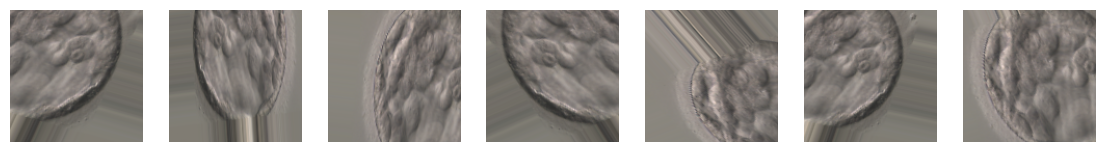

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Initialize the ImageDataGenerator with augmentation options
datagen = ImageDataGenerator(
    rotation_range=30,       # Randomly rotating images 30 degrees
    width_shift_range=0.3,   # Randomly shift the image horizontally to 30% of the width
    height_shift_range=0.3,  # Randomly shift the image vertically to 30% of the height
    shear_range=0.3,         # Shear intensity (angle in counter-clockwise direction in degrees)
    zoom_range=0.3,          # Randomly zoom 30% into images
    horizontal_flip=True,    # Randomly flip images horizontally
    fill_mode='nearest'      # Fill in newly created pixels after a transformation
)

# Select the first image
sample_image = image_data[0]  # Use the preprocessed image from image_data array

# Reshape the image to add batch dimension
sample_image = np.expand_dims(sample_image, axis=0)

# Apply augmentation and plot several augmented images
augmented_images = datagen.flow(sample_image, batch_size=1)

# Display the first 7 augmented images
plt.figure(figsize=(14, 14))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    aug_img = next(augmented_images)[0]  # Get the next batch of augmented images
    plt.imshow(aug_img)
    plt.axis('off')
plt.show()


# #6. Random Forest Classification

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from PIL import Image
import numpy as np

# Function to load and convert images to array
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = Image.open(path)  # Open the image
        img_array = np.array(img).flatten()  # Convert image to 1D array of pixel values
        images.append(img_array)
    return np.array(images)

# Load and preprocess the images
train_images = load_images(train_images)  # Using the already split train_images paths
test_images = load_images(test_images)    # Using the already split test_images paths

# Step 1: Train the Random Forest classifier
classifier = RandomForestClassifier(random_state=33)
classifier.fit(train_images, train_labels)

# Step 2: Make predictions on the test set
test_predictions = classifier.predict(test_images)

# Step 3: Calculate and display accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
recall = recall_score(test_labels, test_predictions)
f1 = f1_score(test_labels, test_predictions)

# Printing the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Step 4: Display the full classification report
print("\nClassification Report:")
print(classification_report(test_labels, test_predictions, target_names=['Silver (0)', 'Gold (1)']))


Accuracy: 0.85
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Classification Report:
              precision    recall  f1-score   support

  Silver (0)       0.87      0.98      0.92       205
    Gold (1)       0.00      0.00      0.00        30

    accuracy                           0.85       235
   macro avg       0.43      0.49      0.46       235
weighted avg       0.76      0.85      0.80       235



The results from the Random Forest model indicate that it has high accuracy but poor performance for one of the classes. Let’s break down the details:

### Summary of Results

1. **Accuracy: 0.85**
   - This means the model correctly classified 85% of the images overall. However, accuracy alone can be misleading, especially if there's an imbalance in the classes.

2. **Precision, Recall, and F1 Score for Gold (1)**
   - **Precision: 0.00**: Precision is the ratio of true positives to the sum of true positives and false positives. A precision of 0.00 means that the model did not correctly identify any instances of the Gold class.
   - **Recall: 0.00**: Recall (or sensitivity) is the ratio of true positives to the sum of true positives and false negatives. A recall of 0.00 means the model did not identify any Gold class instances at all.
   - **F1 Score: 0.00**: The F1 score is the harmonic mean of precision and recall. A score of 0.00 means the model’s F1 score for the Gold class is zero, which is consistent with zero precision and recall.

3. **Classification Report**
   - **Silver (0)**:
     - **Precision: 0.87**: The model is relatively good at identifying Silver class instances, with 87% of the predicted Silver instances being true positives.
     - **Recall: 0.98**: The model identifies 98% of the actual Silver class instances correctly.
     - **F1 Score: 0.92**: The harmonic mean of precision and recall for the Silver class.
   - **Gold (1)**:
     - **Precision: 0.00**: As previously mentioned, the model failed to correctly identify any Gold class instances.
     - **Recall: 0.00**: The model missed all actual Gold class instances.
     - **F1 Score: 0.00**: This score reflects the lack of precision and recall for the Gold class.

4. **Averages**:
   - **Macro Average**:
     - **Precision: 0.43**: The average precision across all classes. This is not very high, reflecting poor performance on the Gold class.
     - **Recall: 0.49**: The average recall across all classes. This is also low due to the poor performance on the Gold class.
     - **F1 Score: 0.46**: The average F1 score, reflecting overall performance across both classes.
   - **Weighted Average**:
     - **Precision: 0.76**: Takes into account the number of instances in each class, giving more weight to the Silver class due to its higher number of samples.
     - **Recall: 0.85**: Similarly weighted by the number of instances.
     - **F1 Score: 0.80**: The weighted average F1 score, providing a more balanced view that accounts for class imbalance.

### Interpretation

- **Class Imbalance**: The results suggest there might be a significant imbalance in the dataset, with far fewer Gold class samples compared to Silver. The model is heavily biased toward the majority class (Silver) and fails to learn to identify the minority class (Gold).
- **Model Performance**: While the overall accuracy seems high, it is misleading because the model performs poorly on the minority class. The lack of precision, recall, and F1 score for the Gold class indicates that the model is not effectively distinguishing between the two classes.

# #7. Traditional Machine Learning Model - Support Vector Machines (SVM)
SVMs are excellent at classification tasks

**Note:** Certain preprocessing steps were repeated in every model, because the page experienced unexpected crashes which would have required running the complete code all over again.

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the CSV file containing image file names and labels
csv_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset.csv'
Blastocyst_Dataset = pd.read_csv(csv_path)

# Convert the 'Standard' column to numerical values: Gold = 1, Silver = 0
Blastocyst_Dataset['Standard_Numeric'] = Blastocyst_Dataset['Standard'].map({'Gold': 1, 'Silver': 0})

# Define the path to the images folder
image_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset/'

# Function to load and preprocess images
def load_and_preprocess_image(image_file):
    img = load_img(os.path.join(image_path, image_file), target_size=(128, 128), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array.flatten()  # Flatten the image array to 1D

# Load all images with their corresponding labels
image_data = []
labels = []

for i in range(len(Blastocyst_Dataset)):
    image_file = Blastocyst_Dataset.loc[i, 'Image File Name']
    img_array = load_and_preprocess_image(image_file)
    image_data.append(img_array)
    labels.append(Blastocyst_Dataset.loc[i, 'Standard_Numeric'])

# Convert to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.1, random_state=42, stratify=labels)

# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=33)  # Using linear kernel
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
svm_predictions = svm_classifier.predict(X_test)

# Calculate and display accuracy, precision, recall, and F1 score
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Printing the results
print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"SVM Precision: {svm_precision:.2f}")
print(f"SVM Recall: {svm_recall:.2f}")
print(f"SVM F1 Score: {svm_f1:.2f}")

# Display the full classification report
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions, target_names=['Silver (0)', 'Gold (1)']))


SVM Accuracy: 0.81
SVM Precision: 0.25
SVM Recall: 0.23
SVM F1 Score: 0.24

SVM Classification Report:
              precision    recall  f1-score   support

  Silver (0)       0.89      0.90      0.89       205
    Gold (1)       0.25      0.23      0.24        30

    accuracy                           0.81       235
   macro avg       0.57      0.57      0.57       235
weighted avg       0.81      0.81      0.81       235



The results from  SVM model provide a snapshot of how well it performed on the dataset. Here's a detailed breakdown:

### Summary of Results

1. **Accuracy: 0.81**
   - The model correctly classified 81% of the images overall. While this is a decent accuracy, it does not account for the performance across individual classes.

2. **Precision, Recall, and F1 Score for Gold (1)**
   - **Precision: 0.25**: This means that among the instances the model predicted as Gold, only 25% were correctly identified as Gold. Precision is low, indicating many false positives.
   - **Recall: 0.23**: This means that the model correctly identified only 23% of the actual Gold instances. Recall is low, showing that the model missed many Gold instances.
   - **F1 Score: 0.24**: The F1 score is the harmonic mean of precision and recall. A score of 0.24 reflects the poor performance in both precision and recall for the Gold class.

3. **Classification Report**
   - **Silver (0)**:
     - **Precision: 0.89**: The model is fairly good at identifying Silver instances, with 89% of the predicted Silver instances being true positives.
     - **Recall: 0.90**: The model identifies 90% of the actual Silver instances correctly.
     - **F1 Score: 0.89**: The harmonic mean of precision and recall for the Silver class.
   - **Gold (1)**:
     - **Precision: 0.25**: As mentioned, this reflects that only 25% of the instances predicted as Gold were actually Gold.
     - **Recall: 0.23**: Indicates that only 23% of the actual Gold instances were correctly identified.
     - **F1 Score: 0.24**: The F1 score is very low for the Gold class, indicating poor performance.

4. **Averages**:
   - **Macro Average**:
     - **Precision: 0.57**: The average precision across all classes. This indicates that performance on the Gold class is dragging down the overall precision.
     - **Recall: 0.57**: The average recall across all classes.
     - **F1 Score: 0.57**: The average F1 score across all classes.
   - **Weighted Average**:
     - **Precision: 0.81**: Takes into account the number of instances in each class, giving more weight to the Silver class due to its higher number of samples.
     - **Recall: 0.81**: Similarly weighted by the number of instances.
     - **F1 Score: 0.81**: The weighted average F1 score, which gives a better overall view of the model’s performance considering class imbalance.

### Interpretation

- **Class Imbalance**: Similar to the Random Forest results, the SVM model struggles with the minority class (Gold). Despite having a good overall accuracy, the model performs poorly on the Gold class.
- **Performance on Silver Class**: The model performs well on the Silver class, with high precision, recall, and F1 score. However, this indicates a strong bias toward the majority class.

# #8. Deep Learning Models - CNN
Training the data on a CNN (Convolutional Neural Network) model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

image_data = np.array(image_data)  # Convert to NumPy array
image_data = image_data / 255.0  # Normalize

# Encode the labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, encoded_labels, test_size=0.1, random_state=33, stratify=encoded_labels)

# Define the CNN model
model = models.Sequential()

# The Convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output for the fully connected layers
model.add(layers.Flatten())

# The Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Adding dropout for regularization
model.add(layers.Dense(2, activation='softmax'))  # Output layer for 2 classes

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=7, validation_data=(X_test, y_test))

# Evaluate the model
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_test, y_test, verbose=0)[1]

print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='binary')
recall = recall_score(y_test, y_pred_classes, average='binary')
f1 = f1_score(y_test, y_pred_classes, average='binary')

# Print the results
print(f"\nModel Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

# Print the classification report
print("\nClassification Report:")
class_names = ['Silver (0)', 'Gold (1)']  # Use a list of strings for class names
print(classification_report(y_test, y_pred_classes, target_names=class_names))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,392,002 (28.20 MB)

 Trainable params: 7,392,002 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 110ms/step - accuracy: 0.8737 - loss: 0.4581 - val_accuracy: 0.8723 - val_loss: 0.3819
Epoch 2/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8773 - loss: 0.4054 - val_accuracy: 0.8723 - val_loss: 0.4013
Epoch 3/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8794 - loss: 0.3857 - val_accuracy: 0.8723 - val_loss: 0.3820
Epoch 4/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8566 - loss: 0.4272 - val_accuracy: 0.8723 - val_loss: 0.3838
Epoch 5/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8807 - loss: 0.3900 - val_accuracy: 0.8723 - val_loss: 0.4319
Epoch 6/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.8731 - loss: 0.4207 - val_accuracy: 0.8723 - val_loss: 0.3819
Epoch 7/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8689 - loss: 0.4062 - val_accuracy: 0.8723 - val_loss: 0.3855

Training Accuracy: 87.20%
Testing Accuracy: 87.23%


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Model Performance:
Accuracy: 87.23%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%

Classification Report:
              precision    recall  f1-score   support

  Silver (0)       0.87      1.00      0.93       205
    Gold (1)       0.00      0.00      0.00        30

    accuracy                           0.87       235
   macro avg       0.44      0.50      0.47       235
weighted avg       0.76      0.87      0.81       235



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: Unde

The CNN model results provide insight into its performance across different classes in the dataset. Here's a detailed breakdown:

### Summary of Results

1. **Accuracy: 87.23%**
   - The CNN model correctly classified 87.23% of the images overall. This indicates a relatively high accuracy.

2. **Precision, Recall, and F1 Score for Gold (1)**
   - **Precision: 0.00%**: None of the instances predicted as Gold were actually Gold. This indicates a severe issue with false positives for the Gold class.
   - **Recall: 0.00%**: The model did not correctly identify any of the actual Gold instances. This suggests the model is failing to detect Gold instances altogether.
   - **F1 Score: 0.00%**: The F1 score is zero because both precision and recall are zero for the Gold class.

3. **Classification Report**
   - **Silver (0)**:
     - **Precision: 0.87**: The model is fairly accurate in identifying Silver instances, with 87% of the predicted Silver instances being true positives.
     - **Recall: 1.00**: The model identifies all actual Silver instances correctly.
     - **F1 Score: 0.93**: A high F1 score for the Silver class indicates strong performance in both precision and recall for this class.
   - **Gold (1)**:
     - **Precision: 0.00**: Reflects that none of the instances predicted as Gold were correct.
     - **Recall: 0.00**: Indicates that none of the actual Gold instances were correctly identified.
     - **F1 Score: 0.00**: Reflects the poor performance in both precision and recall for the Gold class.

4. **Averages**:
   - **Macro Average**:
     - **Precision: 0.44**: The average precision across all classes. The low macro precision is largely due to the poor performance on the Gold class.
     - **Recall: 0.50**: The average recall across all classes, which is also low due to the Gold class.
     - **F1 Score: 0.47**: The average F1 score across all classes.
   - **Weighted Average**:
     - **Precision: 0.76**: Takes into account the number of instances in each class, giving more weight to the Silver class due to its higher number of samples.
     - **Recall: 0.87**: Similarly weighted by the number of instances.
     - **F1 Score: 0.81**: The weighted average F1 score, which reflects the overall performance but is influenced by the Silver class due to its prevalence.

### Interpretation

- **Class Imbalance**: Like the previous models, the CNN model struggles with the minority class (Gold). Although the overall accuracy is high, the performance on the Gold class is extremely poor.
- **Performance on Silver Class**: The CNN model performs well on the Silver class, with high precision, recall, and F1 score.

# #— Performance Comparison: Random Forest Classification, SVM and CNN

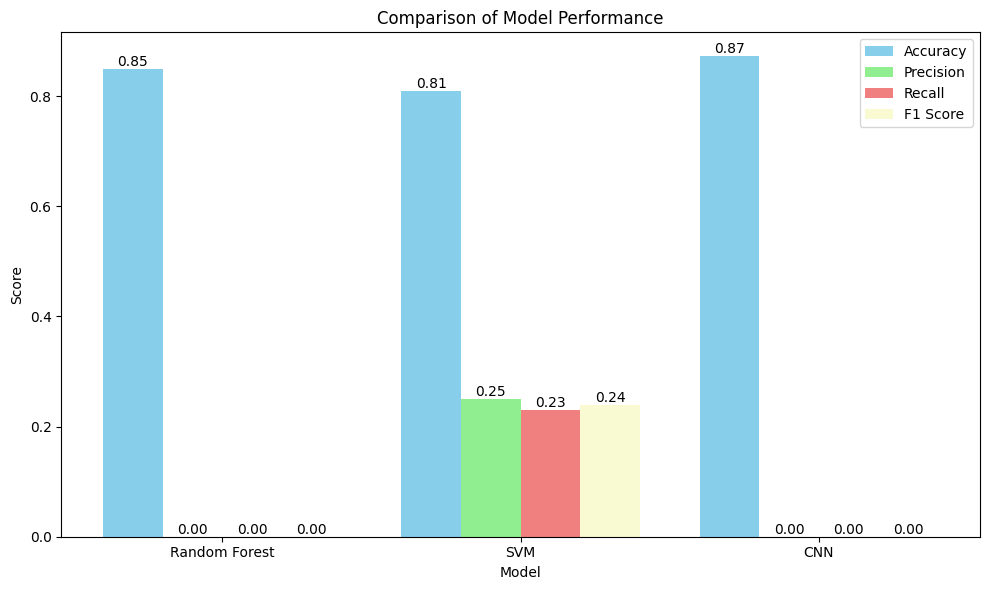

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'SVM', 'CNN']

# Performance metrics
accuracy = [0.85, 0.81, 0.8723]  # Accuracy values
precision = [0.00, 0.25, 0.00]  # Precision values
recall = [0.00, 0.23, 0.00]  # Recall values
f1_score = [0.00, 0.24, 0.00]  # F1 Score values

# Set up the bar positions and width
bar_width = 0.2
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plots for each metric
bars1 = ax.bar(index - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.bar(index - 0.5 * bar_width, precision, bar_width, label='Precision', color='lightgreen')
bars3 = ax.bar(index + 0.5 * bar_width, recall, bar_width, label='Recall', color='lightcoral')
bars4 = ax.bar(index + 1.5 * bar_width, f1_score, bar_width, label='F1 Score', color='lightgoldenrodyellow')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


# #9. Transfer Learning: ResNet-50

In [ ]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the CSV file containing image file names and labels
csv_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset.csv'
Blastocyst_Dataset = pd.read_csv(csv_path)

# Convert the 'Standard' column to numerical values: Gold = 1, Silver = 0
Blastocyst_Dataset['Standard_Numeric'] = Blastocyst_Dataset['Standard'].map({'Gold': 1, 'Silver': 0})

# Define the path to the images folder
image_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset/'

# Function to load and normalize images
def load_and_preprocess_image(image_file):
    img = load_img(os.path.join(image_path, image_file), target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Load all images and their corresponding labels
image_data = []
labels = []

for i in range(len(Blastocyst_Dataset)):
    image_file = Blastocyst_Dataset.loc[i, 'Image File Name']
    img_array = load_and_preprocess_image(image_file)
    image_data.append(img_array)
    labels.append(Blastocyst_Dataset.loc[i, 'Standard_Numeric'])

# Convert to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.1, random_state=33, stratify=labels)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build the ResNet-50 model
def build_resnet_model():
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for binary classification
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (Gold/Silver)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the ResNet model
resnet_model = build_resnet_model()

# Train the ResNet model
resnet_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=7, validation_data=(X_test, y_test))

# Predict on test set
y_pred_resnet = (resnet_model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy_resnet = accuracy_score(y_test, y_pred_resnet)
precision_resnet = precision_score(y_test, y_pred_resnet)
recall_resnet = recall_score(y_test, y_pred_resnet)
f1_resnet = f1_score(y_test, y_pred_resnet)

# Display metrics for ResNet-50
print(f"ResNet-50 Accuracy: {accuracy_resnet * 100:.2f}%")
print(f"ResNet-50 Precision: {precision_resnet:.2f}")
print(f"ResNet-50 Recall: {recall_resnet:.2f}")
print(f"ResNet-50 F1 Score: {f1_resnet:.2f}")


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 312ms/step - accuracy: 0.6612 - loss: 0.6021 - val_accuracy: 0.8723 - val_loss: 0.3810
Epoch 2/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 27s 157ms/step - accuracy: 0.8694 - loss: 0.3966 - val_accuracy: 0.8723 - val_loss: 0.3815
Epoch 3/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.8709 - loss: 0.4044 - val_accuracy: 0.8723 - val_loss: 0.3817
Epoch 4/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.8789 - loss: 0.3823 - val_accuracy: 0.8723 - val_loss: 0.3811
Epoch 5/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.8845 - loss: 0.3710 - val_accuracy: 0.8723 - val_loss: 0.3811
Epoch 6/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 12s 149ms/step - accuracy: 0.8772 - loss: 0.3979 - val_accuracy: 0.8723 - val_loss: 0.3814
Epoch 7/7
66/66 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.8712 - loss: 0.4046 - val_accuracy: 0.8723 - val_loss: 0.3814
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step
ResNet-50 Accuracy: 87.23%
ResNet-50 Precision: 0.00
ResNet-50 Recall: 0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# #10. Transfer Learning - DenseNet 201 on my dataset

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Build the DenseNet201 model
def build_densenet_model():
    base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the base layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for binary classification
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (Gold/Silver)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the DenseNet201 model
densenet_model = build_densenet_model()

# Train the DenseNet201 model
densenet_model.fit(datagen.flow(X_train, y_train, batch_size=33), epochs=7, validation_data=(X_test, y_test))

# Predict on test set
y_pred_densenet = (densenet_model.predict(X_test) > 0.5).astype("int32")

# Calculate metrics
accuracy_densenet = accuracy_score(y_test, y_pred_densenet)
precision_densenet = precision_score(y_test, y_pred_densenet)
recall_densenet = recall_score(y_test, y_pred_densenet)
f1_densenet = f1_score(y_test, y_pred_densenet)

# Display metrics for DenseNet201
print(f"DenseNet201 Accuracy: {accuracy_densenet * 100:.2f}%")
print(f"DenseNet201 Precision: {precision_densenet:.2f}")
print(f"DenseNet201 Recall: {recall_densenet:.2f}")
print(f"DenseNet201 F1 Score: {f1_densenet:.2f}")


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.8195 - loss: 0.5480 - val_accuracy: 0.8723 - val_loss: 0.4100
Epoch 2/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.8449 - loss: 0.4954 - val_accuracy: 0.8723 - val_loss: 0.4122
Epoch 3/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 23s 190ms/step - accuracy: 0.8699 - loss: 0.4300 - val_accuracy: 0.8723 - val_loss: 0.3916
Epoch 4/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 17s 144ms/step - accuracy: 0.8663 - loss: 0.4170 - val_accuracy: 0.8723 - val_loss: 0.3961
Epoch 5/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 208ms/step - accuracy: 0.8677 - loss: 0.4171 - val_accuracy: 0.8723 - val_loss: 0.3961
Epoch 6/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 173ms/step - accuracy: 0.8747 - loss: 0.3986 - val_accuracy: 0.8723 - val_loss: 0.3885
Epoch 7/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 167ms/step - accuracy: 0.8555 - loss: 0.4204 - val_accuracy: 0.8723 - val_loss: 0.3883
8/8 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step
DenseNet201 Accuracy: 87.23%
DenseNet201 Precision: 0.00
DenseNet201 Recall: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# # 11. VGG16, InceptionV3, and Xception

Implementing VGG16, InceptionV3, and Xception, using transfer learning and calculating accuracy, precision, recall, and F1 score.

In [1]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, InceptionV3, Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load the CSV file containing image file names and labels
csv_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset.csv'
Blastocyst_Dataset = pd.read_csv(csv_path)

# Convert the 'Standard' column to numerical values: Gold = 1, Silver = 0
Blastocyst_Dataset['Standard_Numeric'] = Blastocyst_Dataset['Standard'].map({'Gold': 1, 'Silver': 0})

# Define the path to the images folder
image_path = '/content/drive/My Drive/Blastocyst_Dataset/Blastocyst_Dataset/'

# Function to load and normalize images
def load_and_preprocess_image(image_file):
    img = load_img(os.path.join(image_path, image_file), target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Load all images and their corresponding labels
image_data = []
labels = []

for i in range(len(Blastocyst_Dataset)):
    image_file = Blastocyst_Dataset.loc[i, 'Image File Name']
    img_array = load_and_preprocess_image(image_file)
    image_data.append(img_array)
    labels.append(Blastocyst_Dataset.loc[i, 'Standard_Numeric'])

# Convert to NumPy arrays
image_data = np.array(image_data)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(image_data, labels, test_size=0.1, random_state=33, stratify=labels)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Build a function for model creation with a given architecture
def build_model(base_model):
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers for binary classification
    model = Sequential()
    model.add(base_model)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Regularization
    model.add(Dense(1, activation='sigmoid'))  # Binary classification (Gold/Silver)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Function to train the model and evaluate it
def train_and_evaluate(model, X_train, X_test, y_train, y_test, datagen):
    model.fit(datagen.flow(X_train, y_train, batch_size=33), epochs=7, validation_data=(X_test, y_test))

    # Predict on test set
    y_pred = (model.predict(X_test) > 0.5).astype("int32")

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Display metrics
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return accuracy, precision, recall, f1

# Create the models
vgg16_model = build_model(VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))
inception_model = build_model(InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))
xception_model = build_model(Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))

# Train and evaluate the models
print("\nVGG16 Results:")
train_and_evaluate(vgg16_model, X_train, X_test, y_train, y_test, datagen)

print("\nInceptionV3 Results:")
train_and_evaluate(inception_model, X_train, X_test, y_train, y_test, datagen)

print("\nXception Results:")
train_and_evaluate(xception_model, X_train, X_test, y_train, y_test, datagen)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

VGG16 Results:
Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 393ms/step - accuracy: 0.6731 - loss: 0.5968 - val_accuracy: 0.8723 - val_loss: 0.3841
Epoch 2/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 16s 157ms/step - accuracy: 0.8886 - loss: 0.3784 - val_accuracy: 0.8723 - val_loss: 0.3787
Epoch 3/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.8802 - loss: 0.3850 - val_accuracy: 0.8723 - val_loss: 0.3808
Epoch 4/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 132ms/step - accuracy: 0.8786 - loss: 0.3876 - val_accuracy: 0.8723 - val_loss: 0.3811
Epoch 5/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.8736 - loss: 0.3975 - val_accuracy: 0.8723 - val_loss: 0.3818
Epoch 6/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.8786 - loss: 0.3832 - val_accuracy: 0.8723 - val_loss: 0.3829
Epoch 7/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 19s 127ms/step - accuracy: 0.8541 - loss: 0.4307 - val_accuracy: 0.8723 - val_loss: 0.3854
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step
Accuracy: 87.23%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

InceptionV3 Re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 458ms/step - accuracy: 0.8067 - loss: 0.6850 - val_accuracy: 0.8681 - val_loss: 0.4822
Epoch 2/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.8588 - loss: 0.4460 - val_accuracy: 0.8723 - val_loss: 0.4535
Epoch 3/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 123ms/step - accuracy: 0.8539 - loss: 0.4561 - val_accuracy: 0.8723 - val_loss: 0.4350
Epoch 4/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - accuracy: 0.8651 - loss: 0.4312 - val_accuracy: 0.8723 - val_loss: 0.4348
Epoch 5/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 154ms/step - accuracy: 0.8793 - loss: 0.3954 - val_accuracy: 0.8723 - val_loss: 0.4226
Epoch 6/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - accuracy: 0.8623 - loss: 0.4298 - val_accuracy: 0.8723 - val_loss: 0.4109
Epoch 7/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 125ms/step - accuracy: 0.8764 - loss: 0.3933 - val_accuracy: 0.8723 - val_loss: 0.4100
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 749ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 87.23%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00

Xception Results:
Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 409ms/step - accuracy: 0.7957 - loss: 0.5219 - val_accuracy: 0.8723 - val_loss: 0.3832
Epoch 2/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 18s 154ms/step - accuracy: 0.8557 - loss: 0.4425 - val_accuracy: 0.8723 - val_loss: 0.3921
Epoch 3/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 146ms/step - accuracy: 0.8727 - loss: 0.4045 - val_accuracy: 0.8723 - val_loss: 0.3888
Epoch 4/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 127ms/step - accuracy: 0.8746 - loss: 0.3870 - val_accuracy: 0.8723 - val_loss: 0.3869
Epoch 5/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 157ms/step - accuracy: 0.8706 - loss: 0.4010 - val_accuracy: 0.8723 - val_loss: 0.3878
Epoch 6/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 155ms/step - accuracy: 0.8770 - loss: 0.3828 - val_accuracy: 0.8723 - val_loss: 0.3850
Epoch 7/7
64/64 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - accuracy: 0.8744 - loss: 0.3946 - val_accuracy: 0.8723 - val_loss: 0.3865


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 359ms/step
Accuracy: 87.23%
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8723404255319149, 0.0, 0.0, 0.0)

Here's a summary and an updated comparison of the performance metrics for VGG16, InceptionV3, and Xception models:

**Results Summary:**

**VGG16:**
- **Accuracy**: 87.23%
- **Precision**: 0.00
- **Recall**: 0.00
- **F1 Score**: 0.00

**InceptionV3:**
- **Accuracy**: 87.23%
- **Precision**: 0.00
- **Recall**: 0.00
- **F1 Score**: 0.00

**Xception:**
- **Accuracy**: 87.23%
- **Precision**: 0.00
- **Recall**: 0.00
- **F1 Score**: 0.00

**Interpretation:**
All three models—VGG16, InceptionV3, and Xception—achieve the same accuracy of 87.23%. However, their precision, recall, and F1 scores are all 0.00. This indicates that, despite the high accuracy, the models are not correctly identifying any instances of the positive class (Gold), leading to zero precision, recall, and F1 score for that class.



# #— Performance Comparison: ResNet-50, DenseNet 201, VGG16, InceptionV3, and Xception

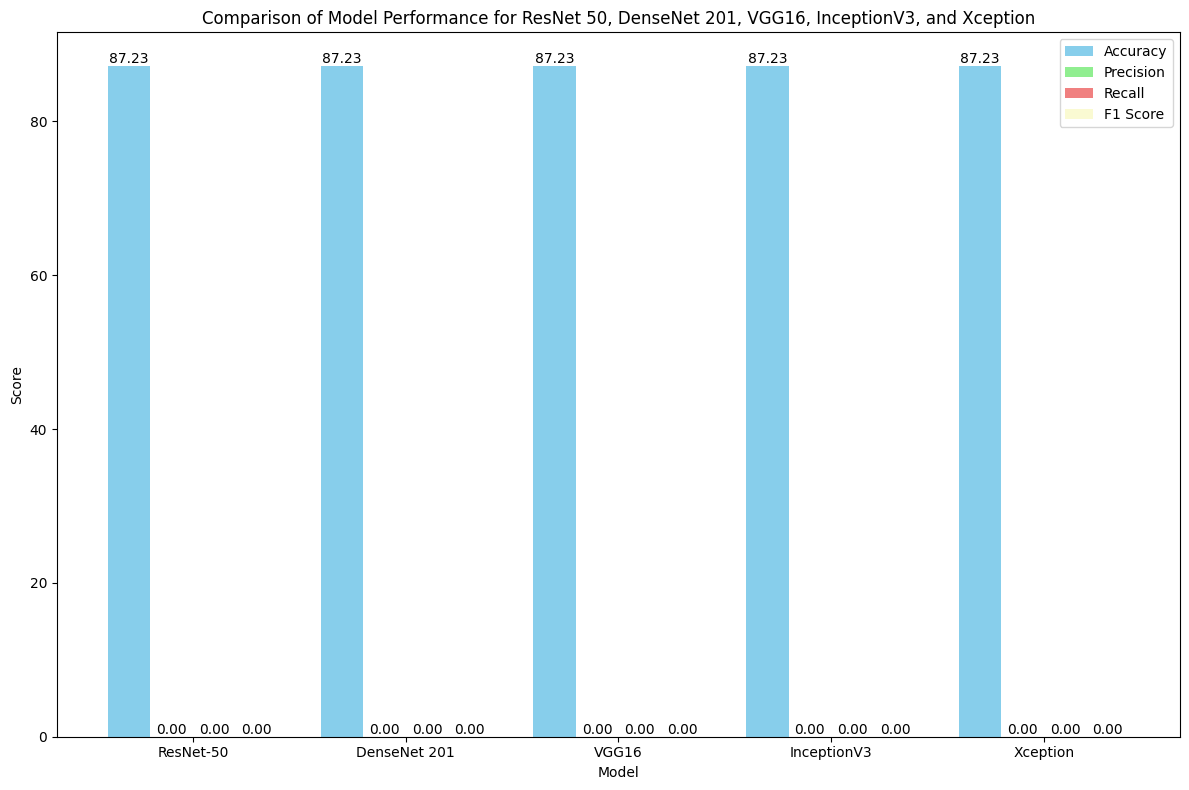

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['ResNet-50','DenseNet 201','VGG16', 'InceptionV3', 'Xception']

# Performance metrics
accuracy = [87.23, 87.23, 87.23, 87.23, 87.23]  # Accuracy percentages
precision = [0.00, 0.00, 0.00, 0.00, 0.00]  # Precision values
recall = [0.00, 0.00, 0.00, 0.00, 0.00]  # Recall values
f1_score = [0.00, 0.00, 0.00, 0.00, 0.00]  # F1 Score values

# Convert accuracy to percentage for consistency
accuracy = [round(acc, 2) for acc in accuracy]

# Set up the bar positions and width
bar_width = 0.2
index = np.arange(len(models))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bar plots for each metric
bars1 = ax.bar(index - 1.5 * bar_width, accuracy, bar_width, label='Accuracy', color='skyblue')
bars2 = ax.bar(index - 0.5 * bar_width, precision, bar_width, label='Precision', color='lightgreen')
bars3 = ax.bar(index + 0.5 * bar_width, recall, bar_width, label='Recall', color='lightcoral')
bars4 = ax.bar(index + 1.5 * bar_width, f1_score, bar_width, label='F1 Score', color='lightgoldenrodyellow')

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance for ResNet 50, DenseNet 201, VGG16, InceptionV3, and Xception')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Add value labels on top of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


## — Confusion Matrix for VGG Model

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

      Silver       0.87      1.00      0.93       205
        Gold       0.00      0.00      0.00        30

    accuracy                           0.87       235
   macro avg       0.44      0.50      0.47       235
weighted avg       0.76      0.87      0.81       235



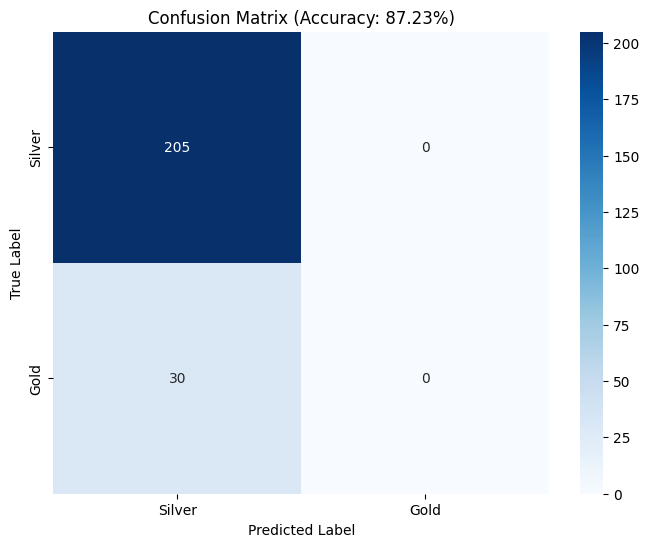

In [34]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Choose one of the  models trained above
model = vgg16_model

# Predict on the test set
test_predictions = (model.predict(X_test) > 0.5).astype("int32")  # Binary classification

# Flatten the predictions array
test_predictions = test_predictions.flatten()

# Calculate accuracy score
accuracy = accuracy_score(y_test, test_predictions)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Define class labels
class_labels = ['Silver', 'Gold']

# Plot confusion matrix with accuracy score in the title
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title(f'Confusion Matrix (Accuracy: {accuracy * 100:.2f}%)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Print classification report
classification_rep = classification_report(y_test, test_predictions, target_names=class_labels)
print("Classification Report:\n", classification_rep)

# Show the figure
plt.show()

This confusion matrix shows the performance of a binary classification model with two classes: "Silver" and "Gold." Here’s the breakdown of the values:

- True Positives (Silver predicted as Silver): 205
- False Negatives (Gold predicted as Silver): 30
- False Positives (Silver predicted as Gold): 0
- True Negatives (Gold predicted as Gold): 0

**Observations:**
- The model predicts the "Silver" class correctly but fails to predict the "Gold" class at all.
- There are no instances where "Gold" is correctly predicted.
- The overall accuracy is 87.23%, which mainly reflects the model's ability to predict the "Silver" class correctly, as it fails to predict any "Gold" instances.

# #— Xception Model with SMOTE

**Addressing Class Imbalance:**
To improve detection of the underrepresented "Gold" class, we use SMOTE (Synthetic Minority Oversampling Technique). SMOTE generates synthetic samples for the minority class, balancing the dataset and preventing bias towards the majority class.

We apply SMOTE to the training set, oversampling the "Gold" class. Since SMOTE requires 2D data, we first flatten the image data (X_train), and after oversampling, reshape it back to its original dimensions for model compatibility.

The train_and_evaluate function trains the Xception model on the balanced dataset, helping it classify both "Gold" and "Silver" effectively. Finally, we evaluate the model on the original test set to see how well it generalizes to unseen data, especially for the "Gold" class.

In [2]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=33)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train.reshape(X_train.shape[0], -1), y_train)

# Reshape back to the original image shape
X_train_resampled = X_train_resampled.reshape(-1, 128, 128, 3)

# Create and train the Xception model
xception_model = build_model(Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3)))

print("\nXception with SMOTE Results:")
train_and_evaluate(xception_model, X_train_resampled, X_test, y_train_resampled, y_test, datagen)



Xception with SMOTE Results:
Epoch 1/7


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


112/112 ━━━━━━━━━━━━━━━━━━━━ 35s 239ms/step - accuracy: 0.5428 - loss: 0.7287 - val_accuracy: 0.8000 - val_loss: 0.5030
Epoch 2/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 18s 150ms/step - accuracy: 0.6248 - loss: 0.6533 - val_accuracy: 0.7787 - val_loss: 0.5237
Epoch 3/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 17s 148ms/step - accuracy: 0.6485 - loss: 0.6315 - val_accuracy: 0.7915 - val_loss: 0.5037
Epoch 4/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 161ms/step - accuracy: 0.6562 - loss: 0.6341 - val_accuracy: 0.7234 - val_loss: 0.5690
Epoch 5/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 152ms/step - accuracy: 0.6691 - loss: 0.6142 - val_accuracy: 0.7872 - val_loss: 0.5245
Epoch 6/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 162ms/step - accuracy: 0.6671 - loss: 0.6066 - val_accuracy: 0.7957 - val_loss: 0.5195
Epoch 7/7
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 148ms/step - accuracy: 0.6734 - loss: 0.6143 - val_accuracy: 0.7617 - val_loss: 0.5398


8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 318ms/step
Accuracy: 76.17%
Precision: 0.04
Recall: 0.03
F1 Score: 0.03


(0.7617021276595745,
 0.03571428571428571,
 0.03333333333333333,
 0.03448275862068965)

##Confusion matrix for Xception model with SMOTE

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


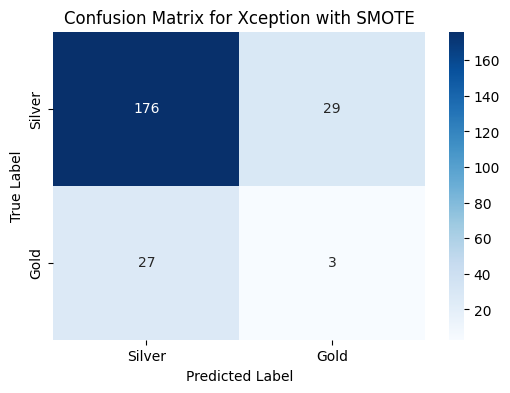

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = (xception_model.predict(X_test) > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Silver', 'Gold'], yticklabels=['Silver', 'Gold'])
plt.title('Confusion Matrix for Xception with SMOTE')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix for Xception with SMOTE shows the following results:

- **True Positives (TP)** for "Gold": 3
- **True Negatives (TN)** for "Silver": 176
- **False Positives (FP)** for "Gold" (Silver predicted as Gold): 29
- **False Negatives (FN)** for "Gold" (Gold predicted as Silver): 27

**Analysis:**
- **Low True Positives**: The model identified very few "Gold" instances correctly (3 out of the actual "Gold" samples).
- **High False Negatives**: A significant number of "Gold" samples are misclassified as "Silver," indicating that the model struggles to recognize "Gold."
- **High False Positives**: The model incorrectly classifies some "Silver" samples as "Gold," leading to a moderate number of false positives.

##Model Testing - Make Predictions [Prototype]
Let's make use of the tkinter library in Python for a simple graphical interface. The program asks for an input image from the user, and then predicts it's standard either "Gold" or "Silver".

Saving 0005_08.png to 0005_08.png


The embryo image uploaded is: 0005_08.png


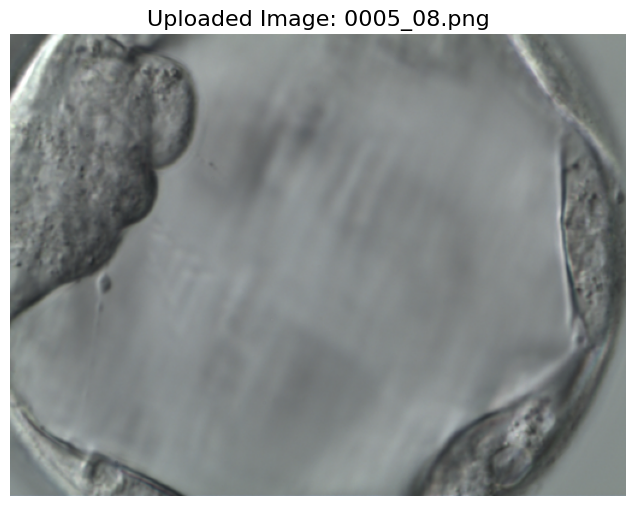

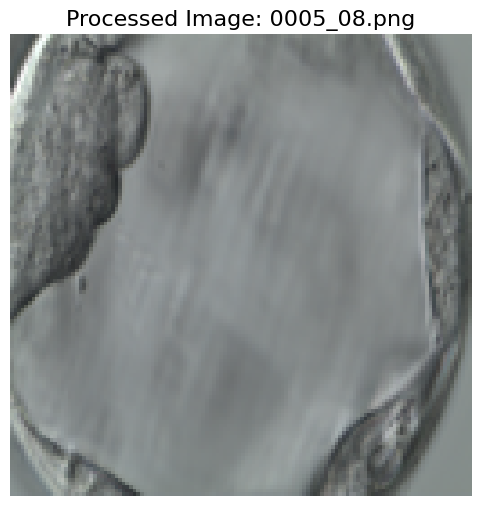

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted Standard: Silver


In [3]:
# Install necessary libraries
!pip install tensorflow pillow numpy scikit-learn matplotlib

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from PIL import Image
import io
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Function to preprocess the input image
def preprocess_input_image(image):
    img = image.resize((128, 128))  # Resize image to match the input shape of the model
    img_array = img_to_array(img)  # Convert image to array
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to make a prediction
def predict_image_standard(model, image):
    # Preprocess the input image
    processed_image = preprocess_input_image(image)

    # Make a prediction
    prediction = model.predict(processed_image)

    # Convert prediction to class label (0: Silver, 1: Gold)
    if prediction > 0.5:
        return "Gold"
    else:
        return "Silver"

# Function to build the Xception model
def build_model(base_model):
    # Add custom top layers for binary classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=x)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Upload an image file from the user's computer
uploaded = files.upload()

# Check if any file is uploaded
if uploaded:
    # Get the uploaded image filename
    image_path = list(uploaded.keys())[0]
    img = Image.open(io.BytesIO(uploaded[image_path]))

    # Print the uploaded image filename
    print(f'\n\nThe embryo image uploaded is: {image_path}')

    # Display the uploaded image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.title(f'Uploaded Image: {image_path}', fontsize=16)  # Title for the uploaded image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

    # Preprocess the image
    processed_image = preprocess_input_image(img)

    # Convert processed image to PIL for display
    processed_img_pil = Image.fromarray((processed_image[0] * 255).astype(np.uint8))

    # Display the processed image using Matplotlib
    plt.figure(figsize=(8, 6))
    plt.title(f'Processed Image: {image_path}', fontsize=16)  # Title for the processed image
    plt.imshow(processed_img_pil)
    plt.axis('off')  # Hide axes
    plt.show()

    # Build the Xception model
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
    xception_model = build_model(base_model)

    # Make prediction
    result = predict_image_standard(xception_model, img)

    # Print the prediction result
    print(f"Predicted Standard: {result}")
else:
    print("No image uploaded.")
